[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Saving mbti_1.csv.zip to mbti_1.csv (1).zip
Extracted files: ['.config', 'mbti_1.csv (1).zip', 'mbti_1.csv.zip', 'mbti_1.csv', 'sample_data']
Unique MBTI Types: ['INFJ' 'ENTP' 'INTP' 'INTJ' 'ENTJ' 'ENFJ' 'INFP' 'ENFP' 'ISFP' 'ISTP'
 'ISFJ' 'ISTJ' 'ESTP' 'ESFP' 'ESTJ' 'ESFJ']


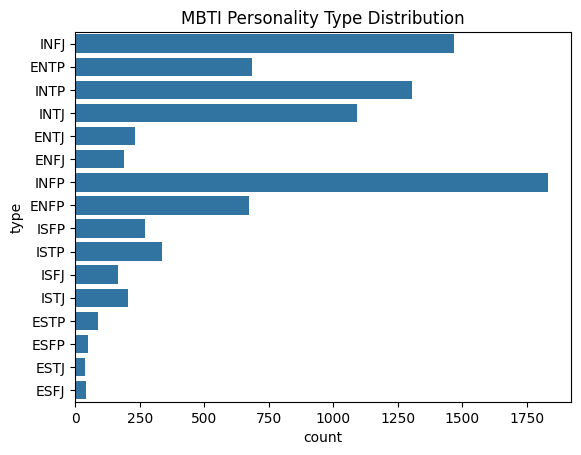

Accuracy: 0.6334293948126801
Classification Report:
              precision    recall  f1-score   support

        ENFJ       0.56      0.12      0.20        41
        ENFP       0.71      0.56      0.62       125
        ENTJ       0.79      0.34      0.48        44
        ENTP       0.67      0.52      0.58       135
        ESFJ       0.00      0.00      0.00         7
        ESFP       0.00      0.00      0.00         8
        ESTJ       0.00      0.00      0.00         7
        ESTP       1.00      0.13      0.24        15
        INFJ       0.64      0.68      0.66       288
        INFP       0.60      0.86      0.71       370
        INTJ       0.62      0.70      0.66       193
        INTP       0.63      0.78      0.70       293
        ISFJ       0.91      0.22      0.36        45
        ISFP       0.69      0.21      0.32        53
        ISTJ       0.71      0.23      0.34        44
        ISTP       0.71      0.37      0.49        67

    accuracy                

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [2]:
# Step 1: Install required packages
!pip install nltk scikit-learn

# Step 2: Import libraries
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

nltk.download('stopwords')
from nltk.corpus import stopwords

# Step 3: Upload and unzip the dataset
from google.colab import files
uploaded = files.upload()

import zipfile
import os

# Unzip the uploaded file
with zipfile.ZipFile("mbti_1.csv.zip", 'r') as zip_ref:
    zip_ref.extractall()

# Check extracted files
print("Extracted files:", os.listdir())

# Step 4: Load the CSV file
df = pd.read_csv("mbti_1.csv")
df.head()

# Step 5: Basic preprocessing
print("Unique MBTI Types:", df['type'].unique())

# Check class distribution
sns.countplot(y='type', data=df)
plt.title("MBTI Personality Type Distribution")
plt.show()

# Step 6: Clean the text
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'https?://\S+', '', text)  # remove URLs
    text = re.sub(r'[^a-z\s]', '', text)      # remove non-alphabetic
    text = re.sub(r'\s+', ' ', text)          # remove extra spaces
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

df['clean_text'] = df['posts'].apply(clean_text)

# Step 7: Vectorization using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text'])

# Step 8: Encode target labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df['type'])

# Step 9: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 10: Train a classifier
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 11: Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))
